# Use the Pipeline class and Gridsearch with Cross-Validation to find best Model Parameters

## Import Packages and Load Data

In [46]:
from sklearn.datasets import load_boston
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

In [2]:
boston = load_boston()
boston.data.shape

(506, 13)

In [3]:
X = boston.data
y = boston.target

## Train Test Split (70/30)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Set up the Pipeline and Parameter Grid and run GridSearchCV

In [5]:
pl = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

In [6]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3], 'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [7]:
grid_search = GridSearchCV(pl, param_grid, verbose=2, n_jobs=-1)

In [8]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  75 out of  90 | elapsed:    2.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                      

In [33]:
print('Best Parameters:\n{}\n'.format(grid_search.best_params_))
print('Best Cross-Validation Score: {:.2f}'.format(grid_search.best_score_))
print('Test Set Score: {:.2f}'.format(grid_search.score(X_test, y_test)))

Best Parameters:
{'polynomialfeatures__degree': 2, 'ridge__alpha': 10}

Best Cross-Validation Score: 0.84
Test Set Score: 0.85


## Heatmap of mean_test_score for each parameter combination

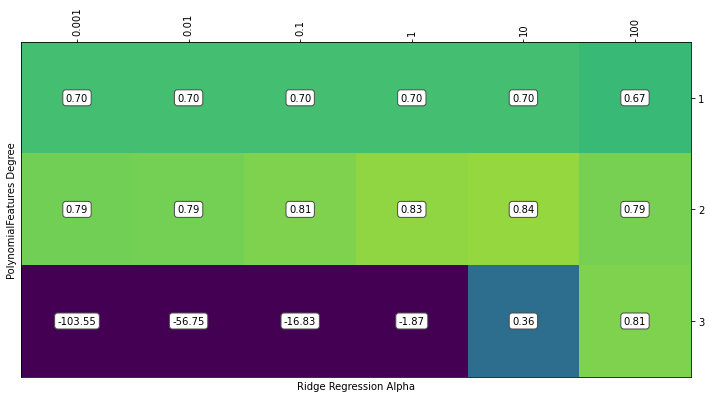

In [58]:
fig, ax = plt.subplots(figsize=(12,12))

data = grid_search.cv_results_['mean_test_score'].reshape(3, -1)

ax.matshow(data, vmin=0, vmax=1, )
ax.set_xlabel('Ridge Regression Alpha')
ax.set_ylabel('PolynomialFeatures Degree')

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

ax.set_xticks(range(len(param_grid['ridge__alpha'])))
ax.set_yticks(range(len(param_grid['polynomialfeatures__degree'])))

ax.xaxis.tick_top()
ax.yaxis.tick_right()
ax.set_xticklabels(param_grid['ridge__alpha'], rotation=90)
ax.set_yticklabels(param_grid['polynomialfeatures__degree']);